In [ ]:
pip install pandas scikit-learn matplotlib

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

In [2]:
#Creating the csv dataset for Debby Storm
data = {
    "name": ["Debby"] * 50,
    "month": [8] * 50,
    "day": [
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8
    ],
    "hour": [
        15, 18, 21, 0, 3, 6, 9, 12, 15, 18, 21, 0, 3, 6, 9, 12, 15, 18, 21, 0, 3, 6, 8, 9, 10, 11, 12, 15, 18, 21, 0, 3, 6, 9, 12, 15, 18, 0, 3, 6, 9, 12, 15, 18, 21, 0, 3, 6, 9, 12
    ],
    "lat": [
        20.9, 21.1, 21.4, 21.4, 21.4, 21.6, 22.0, 22.2, 22.8, 23.1, 23.9, 24.1, 24.4, 24.9, 25.5,
        26.3, 27.0, 27.3, 27.7, 28.1, 28.6, 29.1, 29.3, 29.5, 29.6, 29.7, 29.9, 30.2, 30.4, 30.5,
        30.7, 31.1, 31.2, 31.6, 31.9, 31.9, 32.0, 32.1, 31.8, 31.8, 31.8, 31.9, 32.2, 32.3, 32.4,
        32.5, 32.7, 32.9, 33.0, 33.2
    ],
    "long": [
        -76.6, -77.5, -78.3, -78.9, -79.7, -80.1, -80.7, -81.5, -82.0, -82.6, -83.2, -83.3, -83.6,
        -83.9, -84.0, -84.2, -84.3, -84.4, -84.4, -84.1, -84.0, -83.8, -83.7, -83.7, -83.7, -83.5,
        -83.4, -83.2, -83.1, -82.9, -82.4, -82.1, -81.9, -81.6, -81.3, -81.0, -80.9, -80.8, -80.6,
        -80.2, -79.8, -79.5, -79.4, -79.2, -79.1, -79.1, -79.4, -79.5, -79.6, -79.7
    ],
    "wind(mph)": [
        30, 30, 30, 30, 30, 30, 30, 30, 35, 35, 40, 40, 45, 45, 50, 60, 65, 65, 65, 70, 75, 80, 80,
        80, 80, 80, 75, 70, 65, 50, 45, 45, 45, 45, 45, 40, 40, 40, 40, 40, 45, 45, 45, 60, 60, 60,
        50, 50, 45, 40
    ],
    "pressure": [
        1012, 1012, 1012, 1010, 1010, 1010, 1009, 1009, 1009, 1009, 1007, 1005, 1003, 1003, 1001,
        1001, 992, 992, 992, 992, 985, 981, 981, 979, 979, 979, 979, 983, 990, 994, 996, 997, 998,
        999, 999, 999, 999, 997, 996, 996, 995, 995, 995, 995, 994, 994, 995, 995, 995, 996
    ]
}

import pandas as pd

# Create DataFrame
df = pd.DataFrame(data)

# Save as CSV file
df.to_csv('debby_storm.csv', index=False)

Enter the name of the storm: Debby


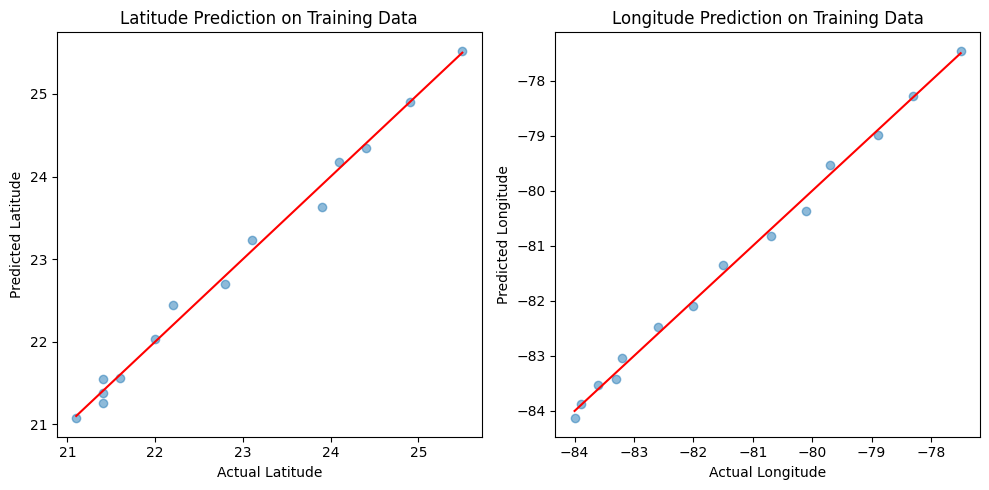

Latitude Prediction MAE on Test Data: 7.6676947321267335
Longitude Prediction MAE on Test Data: 2.3733289203451253

Comparison of Predicted vs Actual Values for the Last 24 Points:
    Actual Latitude  Predicted Latitude  Actual Longitude  \
0              26.3           27.055812             -84.2   
1              27.0           27.849479             -84.3   
2              27.3           28.515810             -84.4   
3              27.7           29.269308             -84.4   
4              28.1           29.727933             -84.1   
5              28.6           30.568600             -84.0   
6              29.1           31.464602             -83.8   
7              29.3           32.001045             -83.7   
8              29.5           32.273434             -83.7   
9              29.6           32.513989             -83.7   
10             29.7           32.865212             -83.5   
11             29.9           33.192936             -83.4   
12             30.2       

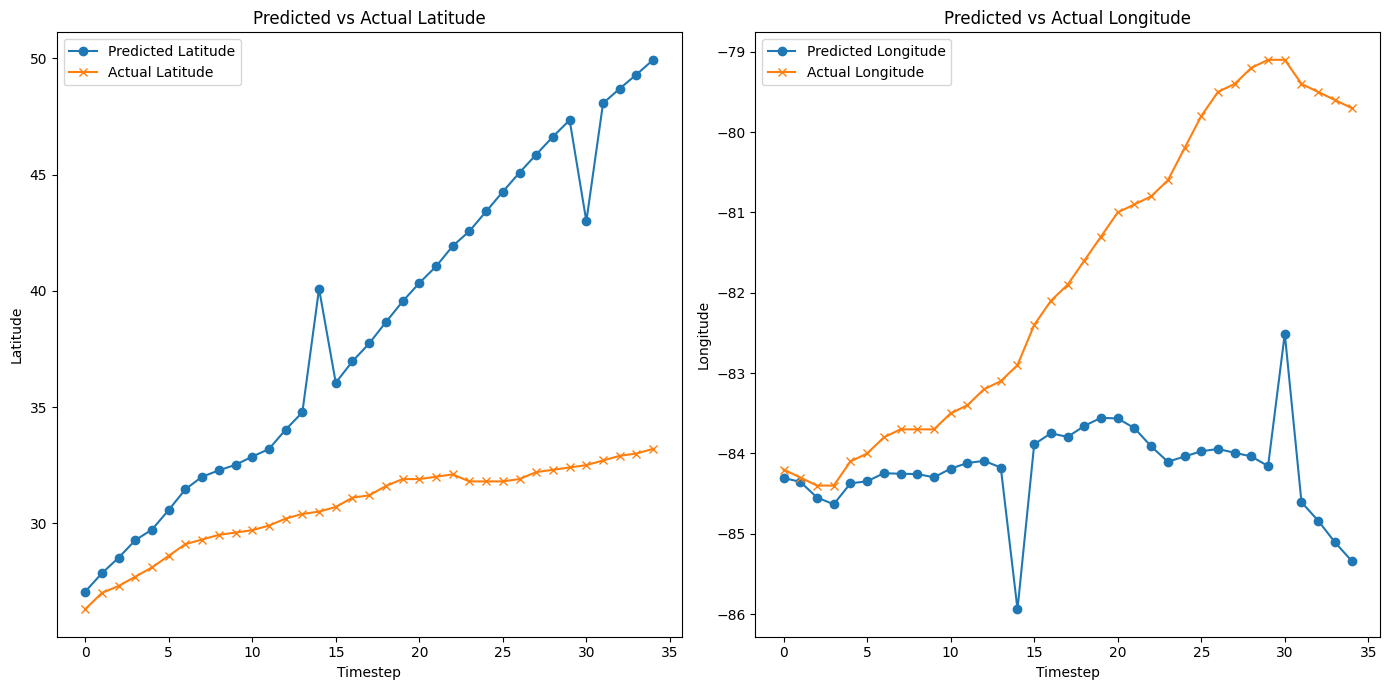

In [18]:
# Dataset
stripped_storms_df = pd.read_csv('/content/debby_storm.csv')

# Input the storm name
storm_name = input("Enter the name of the storm: ")
storm_data = stripped_storms_df[stripped_storms_df['name'] == storm_name]

if storm_data.empty:
    print("There is no storm with the following name.")
else:
    # Training and testing sets
    train_data = storm_data.iloc[:15]  # First 15 points
    test_data = storm_data.iloc[15:]   # The rest of dataset after first 15 points

    # Prepare the data for training
    X_train = train_data[['lat', 'long', 'month', 'day', 'hour']].values
    y_lat_train = train_data['lat'].shift(-1).dropna().values
    y_long_train = train_data['long'].shift(-1).dropna().values

    # Remove the last row from X_train to match y_lat_train and y_long_train lengths
    X_train = X_train[:-1]

    # Train the Linear Regression model
    lat_model = LinearRegression()
    lat_model.fit(X_train, y_lat_train)
    lon_model = LinearRegression()
    lon_model.fit(X_train, y_long_train)

    # Make predictions on the entire training data
    lat_predictions_train = lat_model.predict(X_train)
    lon_predictions_train = lon_model.predict(X_train)

    # Visualize the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_lat_train, lat_predictions_train, alpha=0.5)
    plt.plot([min(y_lat_train), max(y_lat_train)], [min(y_lat_train), max(y_lat_train)], color='red')
    plt.xlabel('Actual Latitude')
    plt.ylabel('Predicted Latitude')
    plt.title('Latitude Prediction on Training Data')

    plt.subplot(1, 2, 2)
    plt.scatter(y_long_train, lon_predictions_train, alpha=0.5)
    plt.plot([min(y_long_train), max(y_long_train)], [min(y_long_train), max(y_long_train)], color='red')
    plt.xlabel('Actual Longitude')
    plt.ylabel('Predicted Longitude')
    plt.title('Longitude Prediction on Training Data')

    plt.tight_layout()
    plt.show()

    # Predict the rest of latitudes and longitudes
    X_test = test_data[['lat', 'long', 'month', 'day', 'hour']].values
    lat_predictions_test = lat_model.predict(X_test)
    lon_predictions_test = lon_model.predict(X_test)

    # Calculate the accuracy using Mean Absolute Error (MAE)
    lat_mae_test = mean_absolute_error(test_data['lat'].values, lat_predictions_test)
    lon_mae_test = mean_absolute_error(test_data['long'].values, lon_predictions_test)
    print(f'Latitude Prediction MAE on Test Data: {lat_mae_test}')
    print(f'Longitude Prediction MAE on Test Data: {lon_mae_test}')

    # Combine predictions and actual test data and plot it
    comparison_df = pd.DataFrame({
        'Actual Latitude': test_data['lat'].values,
        'Predicted Latitude': lat_predictions_test,
        'Actual Longitude': test_data['long'].values,
        'Predicted Longitude': lon_predictions_test,
        'Month': test_data['month'].values,
        'Day': test_data['day'].values,
        'Hour': test_data['hour'].values
    })

    print("\nComparison of Predicted vs Actual Values for the Last 24 Points:")
    print(comparison_df)

    # Plot predicted and actual values vs timestep for latitude and longitude
    plt.figure(figsize=(14, 7))

    # Latitude
    plt.subplot(1, 2, 1)
    plt.plot(lat_predictions_test, label='Predicted Latitude', marker='o')
    plt.plot(test_data['lat'].values, label='Actual Latitude', marker='x')
    plt.xlabel('Timestep')
    plt.ylabel('Latitude')
    plt.title('Predicted vs Actual Latitude')
    plt.legend()

    # Longitude
    plt.subplot(1, 2, 2)
    plt.plot(lon_predictions_test, label='Predicted Longitude', marker='o')
    plt.plot(test_data['long'].values, label='Actual Longitude', marker='x')
    plt.xlabel('Timestep')
    plt.ylabel('Longitude')
    plt.title('Predicted vs Actual Longitude')
    plt.legend()

    plt.tight_layout()
    plt.show()
